In [19]:
import data_preprocess as dp
import functions as f
import data_evaluation as l
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from importlib import reload
import pandas as pd
import numpy as np
reload(dp)
reload(f)
reload(l)

<module 'data_evaluation' from 'c:\\Users\\vivek\\Documents\\project\\data_evaluation.py'>

In [20]:
df=dp.get_data()
df1=df.copy()
df1=dp.min_max(df1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1728 entries, 2015-01-01 to 2021-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1728 non-null   float64
 1   Low        1728 non-null   float64
 2   Open       1728 non-null   float64
 3   Close      1728 non-null   float64
 4   Volume     1728 non-null   float64
 5   Adj Close  1728 non-null   float64
 6   x0         1728 non-null   float64
dtypes: float64(7)
memory usage: 108.0 KB


,High,Low,Open,Close,Volume,Adj Close,x0
Date,,,,,,,
2015-01-01,441.812073,437.676270,438.988831,439.781311,1367720.0,419.247314,1.0
2015-01-02,443.818054,437.998199,439.880371,438.617340,3383424.0,418.137756,1.0
2015-01-05,441.267212,432.946106,438.344940,433.812897,4662967.0,413.557617,1.0
2015-01-06,432.401276,412.093750,430.915344,414.124512,8596809.0,394.788513,1.0
2015-01-07,425.367950,414.570282,414.619812,423.139069,9562421.0,403.382172,1.0


In [21]:
df=dp.drop_data(df)
df.head()

,Open,Close,x0
Date,,,
2015-01-01,438.988831,439.781311,1.0
2015-01-02,439.880371,438.617340,1.0
2015-01-05,438.344940,433.812897,1.0
2015-01-06,430.915344,414.124512,1.0
2015-01-07,414.619812,423.139069,1.0


<AxesSubplot:xlabel='Date'>

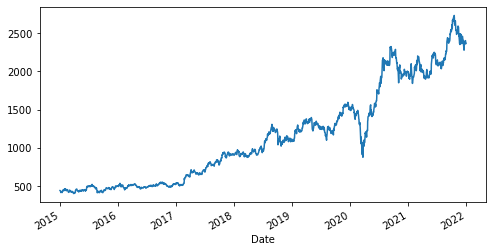

In [22]:
df["Close"].plot(figsize=(8,4))

In [23]:
min_close=df["Close"].min()
max_close=df["Close"].max()

In [24]:
#normalize
df=dp.min_max(df)
df.head()

,Open,Close,x0
Date,,,
2015-01-01,0.014764,0.016398,1.0
2015-01-02,0.015145,0.015899,1.0
2015-01-05,0.014489,0.013837,1.0
2015-01-06,0.011311,0.005388,1.0
2015-01-07,0.004342,0.009257,1.0


In [25]:
df["EMA"] = f.EMA(df["Close"])
df['EMA'] = df['EMA'].shift(1)
df=df.dropna()
df.head()

,Open,Close,x0,EMA
Date,,,,
2015-01-02,0.015145,0.015899,1.0,0.016398
2015-01-05,0.014489,0.013837,1.0,0.016351
2015-01-06,0.011311,0.005388,1.0,0.016111
2015-01-07,0.004342,0.009257,1.0,0.015090
2015-01-08,0.009214,0.006653,1.0,0.014535


<function matplotlib.pyplot.show(close=None, block=None)>

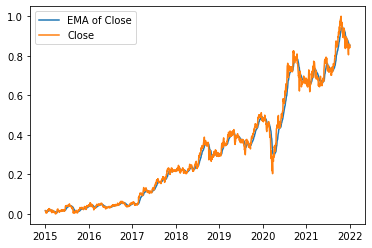

In [26]:
plt.plot(df["EMA"],label="EMA of Close")
plt.plot(df["Close"],label="Close")
plt.legend()
plt.show

<AxesSubplot:xlabel='Date'>

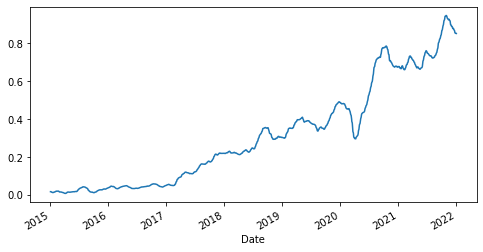

In [27]:
df["EMA"].plot(figsize=(8,4))


In [28]:
train_x,test_x,train_y,test_y=train_test_split(df.loc[:,["Close","x0"]],df["EMA"],test_size=0.01,shuffle=False)
print(train_x.describe(),"\n\n",test_x.describe())
train_x.head()

             Close      x0
count  1709.000000  1709.0
mean      0.311750     1.0
std       0.267927     0.0
min       0.000000     1.0
25%       0.047675     1.0
50%       0.244764     1.0
75%       0.470919     1.0
max       1.000000     1.0 

            Close    x0
count  18.000000  18.0
mean    0.848819   1.0
std     0.019143   0.0
min     0.804959   1.0
25%     0.842771   1.0
50%     0.846006   1.0
75%     0.859116   1.0
max     0.882890   1.0


,Close,x0
Date,,
2015-01-02,0.015899,1.0
2015-01-05,0.013837,1.0
2015-01-06,0.005388,1.0
2015-01-07,0.009257,1.0
2015-01-08,0.006653,1.0


In [29]:
w=f.logistic_regression(train_x,train_y,0.01,100)
w

array([ 5.17076818, -2.69006357])

In [30]:
print("training data loss: ",f.loss1(train_x,train_y,w))


training data loss:  762.5446764063686


In [31]:
y_pred=f.sigmoid(np.dot(test_x,w))
d1=pd.DataFrame(test_y)
d1["pred"]=y_pred
d1.head()

,EMA,pred
Date,,
2021-12-08,0.879991,0.856253
2021-12-09,0.878598,0.866413
2021-12-10,0.878904,0.867054
2021-12-13,0.879284,0.853930
2021-12-14,0.877612,0.845574


In [32]:
loss=f.loss(test_y,y_pred)
loss

7.145739012627361

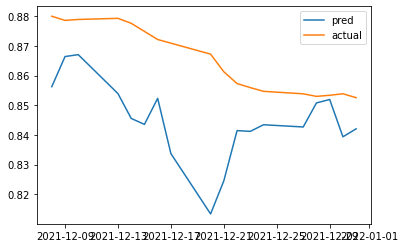

In [33]:
plt.plot(d1["pred"],label="pred")
plt.plot(d1["EMA"],label="actual")
plt.legend()
plt.show()

In [34]:
d1=dp.denormalize_ema(d1,min_close,max_close,1)
d1.head()

,EMA,pred,EMA_unnormalized,pred_EMA
Date,,,,
2021-12-08,0.879991,0.856253,0.878598,0.866413
2021-12-09,0.878598,0.866413,0.878904,0.867054
2021-12-10,0.878904,0.867054,0.879284,0.853930
2021-12-13,0.879284,0.853930,0.877612,0.845574
2021-12-14,0.877612,0.845574,0.874894,0.843550


In [35]:
d1["Open"]=df1.loc[d1.index,["Open"]]
d1["Close"]=df1.loc[d1.index,["Close"]]
d1.head()

,EMA,pred,EMA_unnormalized,pred_EMA,Open,Close
Date,,,,,,
2021-12-08,0.879991,0.856253,0.878598,0.866413,0.863725,0.865360
2021-12-09,0.878598,0.866413,0.878904,0.867054,0.868386,0.881817
2021-12-10,0.878904,0.867054,0.879284,0.853930,0.870632,0.882890
2021-12-13,0.879284,0.853930,0.877612,0.845574,0.884851,0.861733
2021-12-14,0.877612,0.845574,0.874894,0.843550,0.844865,0.849074


In [36]:
l.evaluate_ema(d1)

accuracy of our model:  33.12737546818357 %
---------------------------------------------
profit our model expect:  0.22806273338352256
profit we actually made:  0.055694498714161766
maximum profit that is possible:  0.16812227931443668
percentage of profit we made:  24.420692450661328 %
profit that we can make if we always buy:  0.0264169246638698
profit that we can make if we always sell:  -0.0264169246638698
confusion matrix:  [[3 2]
 [5 7]]
